In [ ]:
# PACE Plan



## About the Dataset
The dataset is comprised of property sales 2016-2017 in Melbourne City and its surrounding region, Australia. It includes 21 variables such as the name of the suburb, address of premises, type of property, number of rooms, price, method of selling, seller information, date of the sale, the distance from the city centre, postcode, the number of bedroom and bathroom, car space, the size of the land, building area, council area, latitude and longitude, the name of the region, and property count. There are 18936 rows and 22 columns with one unnamed. Through data discovery, we learn that the there are presumably 18936 individual sales (including duplicates and null values if any) and 21 variables. 


## Step 1. Import packages and Load Dataset

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 300)


# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_ccpr_grid


# Data Modelling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Evaluation Metrics and utility functions
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, classification_report, roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree
from datetime import datetime

# Save Models
import pickle




# Step 2. Initial EDA

## Load & Learn the Data


In [3]:
#Read the dataset
df = pd.read_csv('Data/Property Sales of Melbourne City.csv')


In [ ]:

df.info()


In [4]:
# Find the number of rows and columns displayed in tuple (no of rows, no of columns)
df.shape

(18396, 22)

In [5]:
#Display the first 10 rows of the data
df.head(10)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,10,Abbotsford,129 Charles St,2,h,941000,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,15,Abbotsford,217 Langridge St,3,h,1000000,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
9,16,Abbotsford,18a Mollison St,2,t,745000,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0


In [6]:
#Display the last 10 rows of the data
df.tail(10)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18386,23535,Westmeadows,9 Black St,3,h,582000,S,Red,26/08/2017,16.5,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
18387,23536,Westmeadows,81 Hillcrest Dr,4,h,720000,VB,Barry,26/08/2017,16.5,3049.0,4.0,2.0,0.0,NaN,NaN,NaN,NaN,-37.68006,144.87550,Northern Metropolitan,2474.0
18388,23537,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
18389,23538,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
18390,23539,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
18391,23540,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,26/08/2017,6.8,3016.0,2.0,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,26/08/2017,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
18395,23546,Yarraville,33 Freeman St,4,h,1050000,VB,Village,26/08/2017,6.3,3013.0,4.0,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


In [7]:
#Calculate summary statistics for the data
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Data Wrangling & Feature Engineering



Upon further reflection, I reckon there are some corrections needed to be made to lessen the impact of potential misunderstandings caused by non-intuitive variable names. 

In [8]:
#Drop the variable that is redundant
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [9]:

#Rename the variables to make them more descriptive
df = df.rename(columns = {'Rooms': 'RoomCounts',
              'Method': 'MethodOfSale',
              'SellerG': 'SellerGroup',
              'Type': 'PropertyType',
              'Bedroom2': 'BedroomCounts',
              'Bathroom': 'BathroomCounts',
              'Car': 'CarSpaceCounts',
              'Distance': 'DistanceToCBD',
              'Landsize':'LandSize',
              'Lattitude': "Latitude",
              'Longtitude': 'Longitude',
              'Regionname': 'Region',
              'Propertycount': 'SuburbPropertyCounts'}
               )



In [10]:
#Displays description of the variables
column_info = {
  'Variable': df.columns,
  'Description': ['Name of the suburb where the property is located', 'Address of the property', 'Number of rooms in the property (excluding bathrooms and other non-living spaces)', 'Type of property (e.g., h = house, t = townhouse, u = unit/apartment)', 'Sale price of the property in Australian Dollars', 'Method of sale (e.g., S = property sold, SP = property sold prior, PI = property passed in, PN = sold prior not disclosed, SN = sold not disclosed, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction)',' Real estate agency or agent handling the sale', 'Date of the sale','Distance from the property to Melbourne central business district (CBD) in kilometers', 'postcode of the suburb', 'Number of bedrooms in the property (including any non-living spaces that could be used as bedrooms)', 'Number of bathrooms in the property', 'Number of car spaces associated with the property', 'Land size of the property in square meters', 'Total building area of the property in square meters', 'The year the property was built ', 'Name of the local government area where the property is located', 'the position of the property in latitude', 'the position of the property in longitude', ' Name of the region where the property is located (e.g., Eastern Metropolitan, Northern Metropolitan, Southern Metropolitan, Western Metropolitan)', 'Number of properties that exist in the suburb']
}
df_info = pd.DataFrame(column_info)
df_info

,Variable,Description
0,Suburb,Name of the suburb where the property is located
1,Address,Address of the property
2,RoomCounts,Number of rooms in the property (excluding bathrooms and other non-living spaces)
3,PropertyType,"Type of property (e.g., h = house, t = townhouse, u = unit/apartment)"
4,Price,Sale price of the property in Australian Dollars
5,MethodOfSale,"Method of sale (e.g., S = property sold, SP = property sold prior, PI = property passed in, PN = sold prior not disclosed, SN = sold not disclosed, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction)"
6,SellerGroup,Real estate agency or agent handling the sale
7,Date,Date of the sale
8,DistanceToCBD,Distance from the property to Melbourne central business district (CBD) in kilometers
9,Postcode,postcode of the suburb


In [11]:
#Checks for missing values in the dataframe
df.isna().sum()


Suburb                      0
Address                     0
RoomCounts                  0
PropertyType                0
Price                       0
MethodOfSale                0
SellerGroup                 0
Date                        0
DistanceToCBD               1
Postcode                    1
BedroomCounts            3469
BathroomCounts           3471
CarSpaceCounts           3576
LandSize                 4793
BuildingArea            10634
YearBuilt                9438
CouncilArea              6163
Latitude                 3332
Longitude                3332
Region                      1
SuburbPropertyCounts        1
dtype: int64

In [15]:
#Calculate the proportion of missing values in the dataframe per variable
null_values = pd.DataFrame({'Null Values': df.isna().sum(), 'Proportion Null Values': df.isna().sum()*100/len(df)})
null_values = null_values.sort_values(by='Proportion Null Values', ascending=False)
null_values

,Null Values,Proportion Null Values
Suburb,0,0.0
Address,0,0.0
Region,0,0.0
Longitude,0,0.0
Latitude,0,0.0
YearBuilt,0,0.0
BuildingArea,0,0.0
LandSize,0,0.0
CarSpaceCounts,0,0.0
BathroomCounts,0,0.0


An Approriate measure has to be taken in order to mitigate such issue. Some of the variables that have null values even exceeds 50% of all the data entries. In order to ensure data integrity and effectiveness of subsequent analysis, data imputation is required. Depending on the objectives the analysis, one might drop a data column all together as it is deemed redundant and provide little to no value to our analysis endeavour. 


In [13]:
#Data Imputation
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median()).round()
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median()).round()
df['LandSize'] = df['LandSize'].fillna(df['LandSize'].median()).round()
df['CarSpaceCounts']=df['CarSpaceCounts'].fillna(df['CarSpaceCounts'].median()).round()
df['BedroomCounts']=df['BedroomCounts'].fillna(df['BedroomCounts'].median()).round()
df['BathroomCounts']=df['BathroomCounts'].fillna(df['BathroomCounts'].median()).round()


In [14]:
#Drop the variables 
df.drop('CouncilArea', axis= 1, inplace = True)
df.dropna(subset=['Latitude','Longitude'], inplace= True)

'CouncilArea' does not provide significant context to the analysis later on as we already have region and suburbs as a way to distinguish the geography between premises, especially that rougly 33.5% of the data are missing the variable value. 



In [16]:
# Mapping the variable value to be descriptive and modify the variable to bring out more informational value
df['PropertyAge'] = datetime.now().year - df['YearBuilt']
df['PropertyType'] = df['PropertyType'].map({'h':'house','t':'townhouse', 'u':"apartment" })
df['MethodOfSale'] = df['MethodOfSale'].map({'S': 'property sold', 'SP':'property sold prior', 'VB': 'vendor bid', 'PI':'property passed in', 'SN':'sold not disclosed', 'W': 'withdrawn prior to auction', 'SA': 'sold after auction', 'PN': 'sold prior not disclosed'})


In [17]:
#Check for duplicate rows/entries in the dataframe
df.duplicated().sum()

0

It seems that there are no missing rows/entries

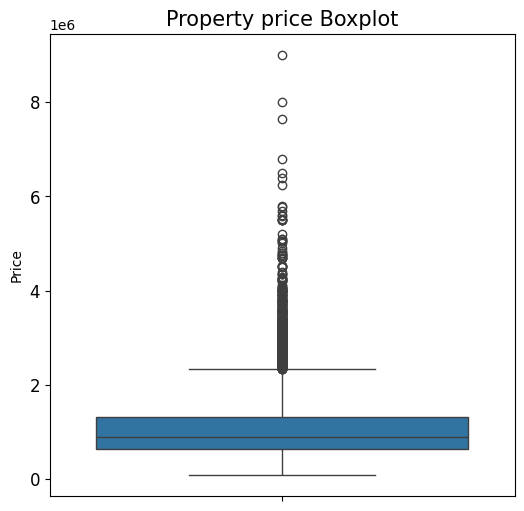

In [18]:
#Check for Outliers in the data
plt.figure(figsize=(6,6))
plt.title('Property price Boxplot', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(y=df['Price'])
plt.show()

In [19]:
#Calculate the 25th and 75th percentile of the price variable
percentile_25th = df['Price'].quantile(0.25)

#Calculate the 75th percentile of the price variable
percentile_75th = df['Price'].quantile(0.75)

#Calculate the interquartile range
iqr = percentile_75th - percentile_25th

#Define the upper and lower limit for inlier values in the price variable
upper_limit = percentile_75th + 1.5*iqr
lower_limit = percentile_25th - 1.5*iqr
print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

outlier_values = df[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]
print("Number of outliers: ", len(outlier_values))

Upper Limit:  2340000.0
Lower Limit:  -380000.0
Number of outliers:  684


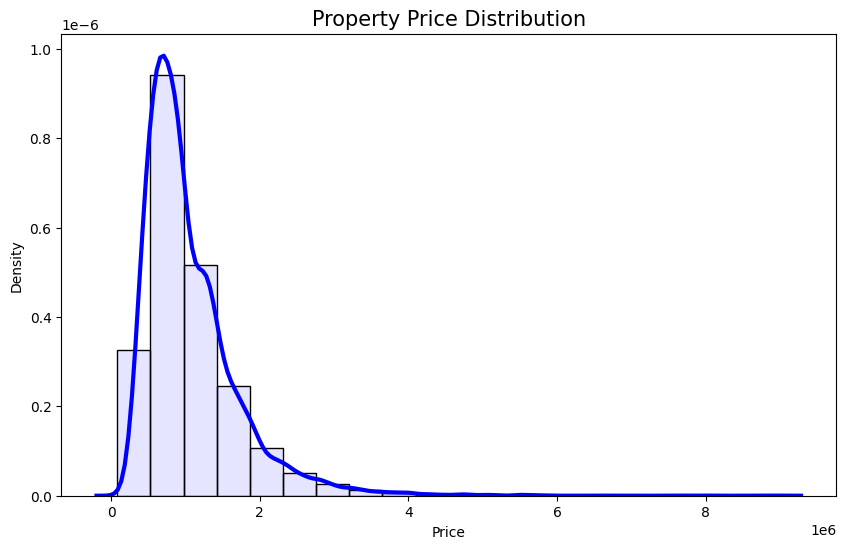

In [20]:
plt.figure(figsize = (10,6))
sns.histplot(df['Price'], kde=True, bins = 20, color='blue', alpha = 0.1, stat='density')
sns.kdeplot(df['Price'], color='blue', linewidth= 3 )
plt.title('Property Price Distribution', fontsize = 15)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

As expected, we learn that the distribution of price variable is positively skewed or right-skewed distribution. To optimize the performance of the model we are going to use later for analysis, I ought to transform the data using the most common technique of data transformation, log transformation.


<Axes: xlabel='Price', ylabel='Density'>

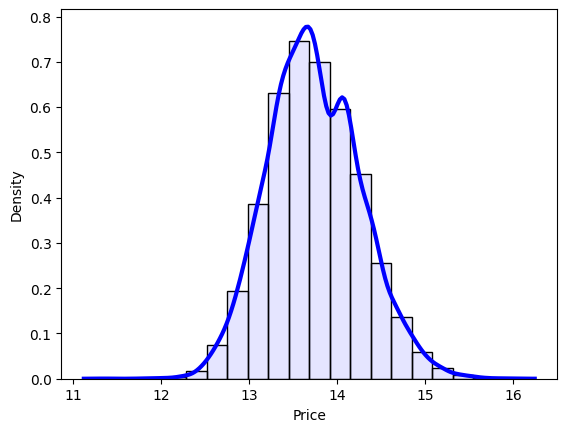

In [21]:
log_price = np.log(df['Price'])
sns.histplot(log_price, bins= 20, kde=True, stat='density', alpha =0.1, color='blue')
sns.kdeplot(log_price, color='blue', linewidth= 3)



Now, The 'Price' Variable roughly follows a normal distribution through the log-transformation we did earlier. 





# PACE Analyze



## Continue EDA 


## Top 10 Priciest and Cheapest Suburb Measured In Median Price

C:\Users\Dustin\AppData\Local\Temp\ipykernel_8588\1404395012.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Suburb', y='Price', data= top_10_median, palette='viridis')


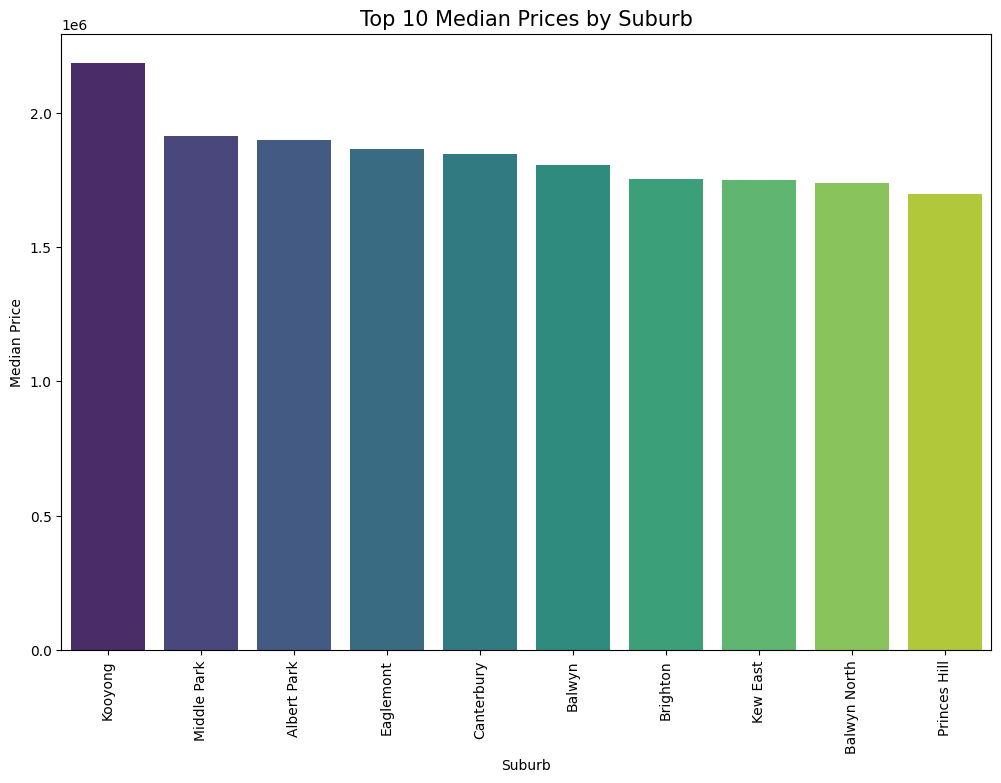

In [22]:
median_property_prices = df.groupby('Suburb')['Price'].median().reset_index()
top_10_median = median_property_prices.sort_values(by='Price', ascending=False).head(10)



plt.figure(figsize=(12,8))
sns.barplot(x= 'Suburb', y='Price', data= top_10_median, palette='viridis')
plt.title('Top 10 Median Prices by Suburb', fontsize = 15)
plt.xlabel('Suburb')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()



C:\Users\Dustin\AppData\Local\Temp\ipykernel_8588\1223927169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Suburb', y='Price', data= bottom_10_median, palette='viridis')


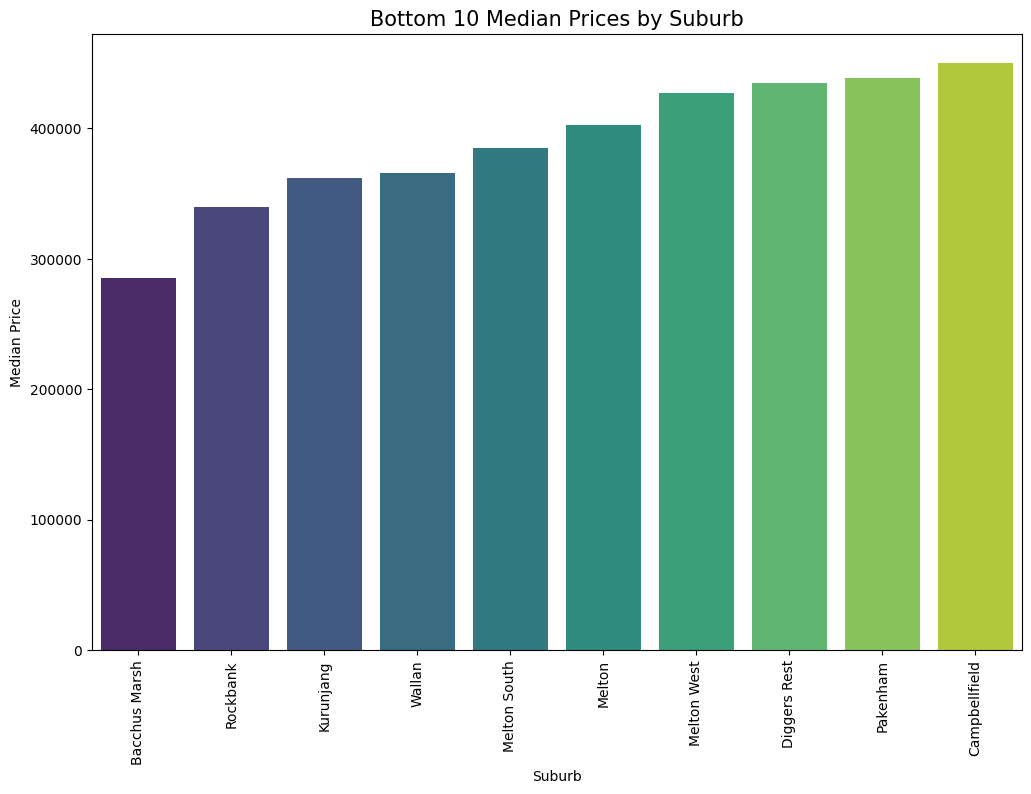

In [23]:
bottom_10_median = median_property_prices.sort_values(by='Price', ascending=True).head(10)
plt.figure(figsize=(12,8))
sns.barplot(x= 'Suburb', y='Price', data= bottom_10_median, palette='viridis')
plt.title('Bottom 10 Median Prices by Suburb', fontsize = 15)
plt.xlabel('Suburb')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()


## Property Type Most Sold

C:\Users\Dustin\AppData\Local\Temp\ipykernel_8588\2171426394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PropertyType', y='count', data = region_property_count, palette='deep')


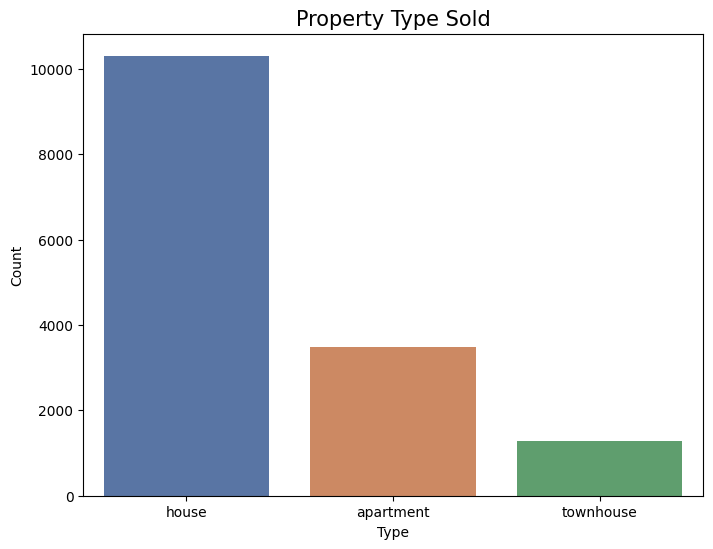

In [24]:
region_property_count = df['PropertyType'].value_counts().reset_index().rename(columns={'index':'Type', 'Type':'count'})
plt.figure(figsize=(8,6))
sns.barplot(x='PropertyType', y='count', data = region_property_count, palette='deep')
plt.title('Property Type Sold', fontsize = 15)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


# Map of the property sold divided by the price group

Text(0.5, 1.0, 'Map Property Sold by Price Group')

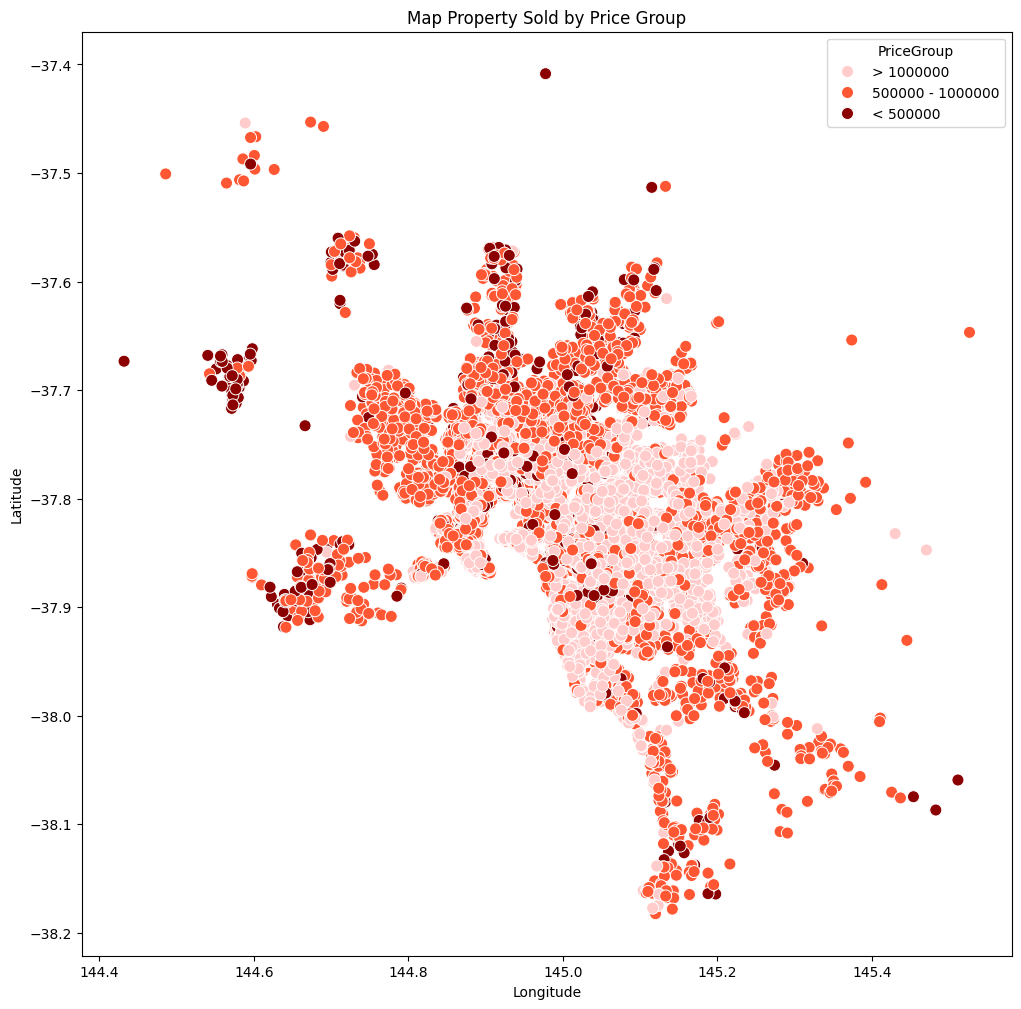

In [25]:
def price_category(price):
  if price < 500000:
   return '< 500000'
  elif price >= 500000 and price < 1000000:
   return '500000 - 1000000'
  else:
   return '> 1000000' 
df['PriceGroup'] = df['Price'].apply(price_category)
plt.figure(figsize=(12,12))
custom_palette = {'< 500000': '#8B0000', '500000 - 1000000': '#FF5733', '> 1000000':  '#FFCCCB'}
sns.scatterplot(x='Longitude',y='Latitude', data=df, hue='PriceGroup', s = 75, palette=custom_palette)
plt.title('Map Property Sold by Price Group')

In [ ]:
df.sort_values(by='Price', ascending=False).head(15)


<Axes: xlabel='Longitude', ylabel='Latitude'>

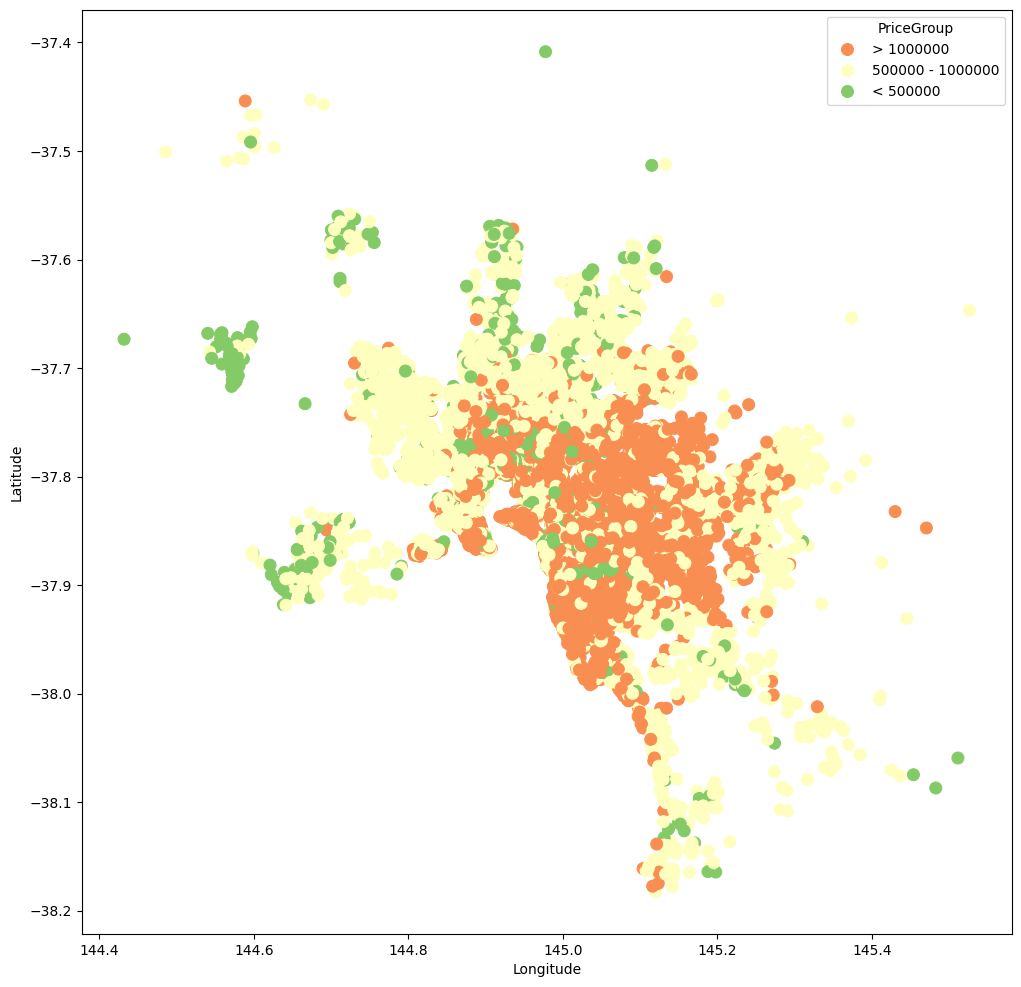

In [31]:
#It looks nicer with hue color
plt.figure(figsize=(12,12))
sns.scatterplot(x='Longitude',y='Latitude', data =df, hue='PriceGroup',s =75,palette='RdYlGn', edgecolor= None)

# Regression on Price and Distance to CBD, Land Area, Building Area, Car Spaces, Property Age, Property Type
To evaluate the relationship between independent variables (Distance to CBD, Land Area, Building Area, and Number of Car spaces) and continuous dependent variable that is price, we ought to use linear regression. Before we create multivariate regression, we have to check our assumptions first.
Assumptions:
- Independence: Each record does not impact other records or should be independent of each other.


## Testing Linearity
To test this, we plot the regression with each independent variable and the dependent variable to check whether the relationship between both variables is linear or not.






In [27]:
#Find the maximum Land Area to establish the range of land area
max_land_area = df['LandSize'].max()
max_land_area

433014.0

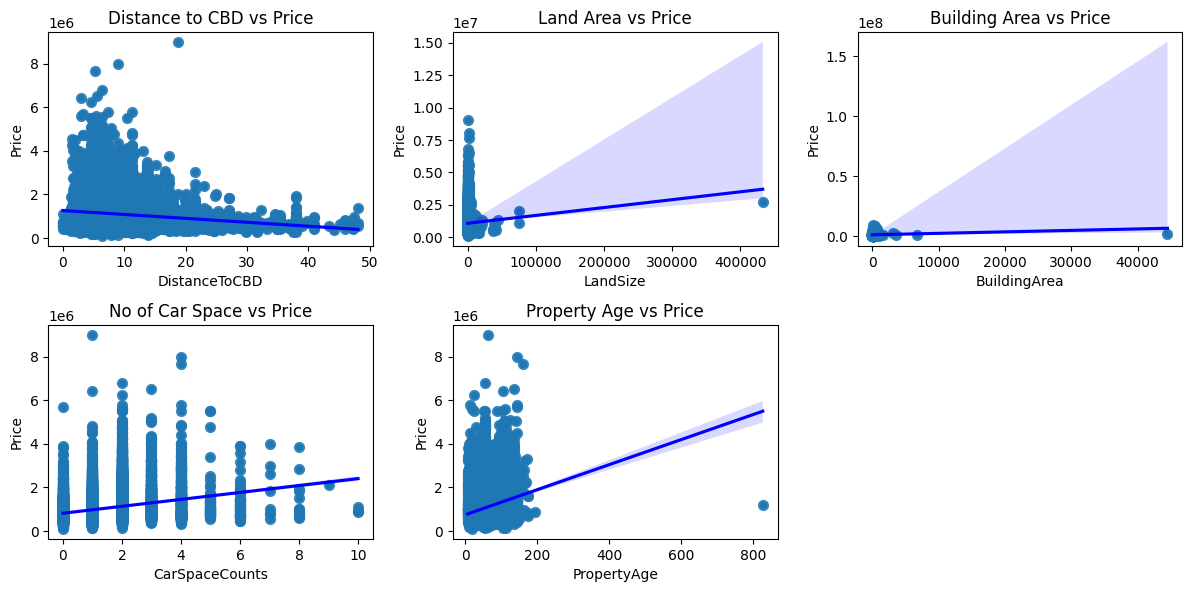

In [28]:
independent_variables = df[['DistanceToCBD', 'LandSize', 'CarSpaceCounts', 'BuildingArea', 'PropertyAge'  ] ]
dependent_variable = df['Price']

#Adding Intercept
independent_variables = sm.add_constant(independent_variables)
OLS_model = sm.OLS(dependent_variable,independent_variables).fit()
residuals = OLS_model.resid

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.scatterplot(x=df['DistanceToCBD'], y= df['Price'])
sns.regplot(x=df['DistanceToCBD'], y=df['Price'], ci = 95, line_kws={'color': 'blue'}, scatter_kws={'s':50})
plt.title('Distance to CBD vs Price')

plt.subplot(2,3,2)
sns.scatterplot(x=df['LandSize'], y=df['Price'])
sns.regplot(x=df['LandSize'], y=df['Price'], ci=95, line_kws ={'color': 'blue'}, scatter_kws ={'s': 50})
plt.title('Land Area vs Price')


plt.subplot(2,3,3)
sns.scatterplot(x=df['BuildingArea'], y=df['Price'])
sns.regplot(x=df['BuildingArea'], y=df['Price'], ci=95, line_kws={'color': 'blue'}, scatter_kws ={'s': 50})
plt.title('Building Area vs Price')

plt.subplot(2,3,4)
sns.scatterplot(x=df['CarSpaceCounts'], y=df['Price'])
sns.regplot(x=df['CarSpaceCounts'], y=df['Price'], ci=95, line_kws = {'color':'blue'}, scatter_kws = {'s': 50})
plt.title('No of Car Space vs Price')

plt.subplot(2,3,5)
sns.scatterplot(x=df['PropertyAge'], y=df['Price'])
sns.regplot(x=df['PropertyAge'], y=df['Price'], ci= 95, line_kws = {'color': 'blue'}, scatter_kws = {'s': 50}, )
plt.title('Property Age vs Price')


plt.tight_layout(pad=1.0)
plt.show()




Based on the visual of the plot, we can certainly assume that 'Distance to CBD vs Price' does not meet the linearity assumption as the fitted line is nearly horizontal, implying weak relationship between variables. Quite a wide prediction band for 'Land Area vs Price' and 'Building Area vs Price' which may imply that there is an existence of leverage point mainly because of outliers exist in both of these regression plot. Such Uncertainty would also be explained high variability of the data meaning it does not truly fit the data well. From those plots, only 'No of Car Space vs Price' and 'Property Age vs Price' marginally met the assumption. But 'Property Age vs Price' has comparatively better fitted line compared to the former. Hence, we continue on the test of normality of residuals for 'Property Age vs Price' plot. 

## Testing Normality of Residuals
Using Q-Q plot, histogram, and shapiro-Wilk test to test the normality of the residuals.

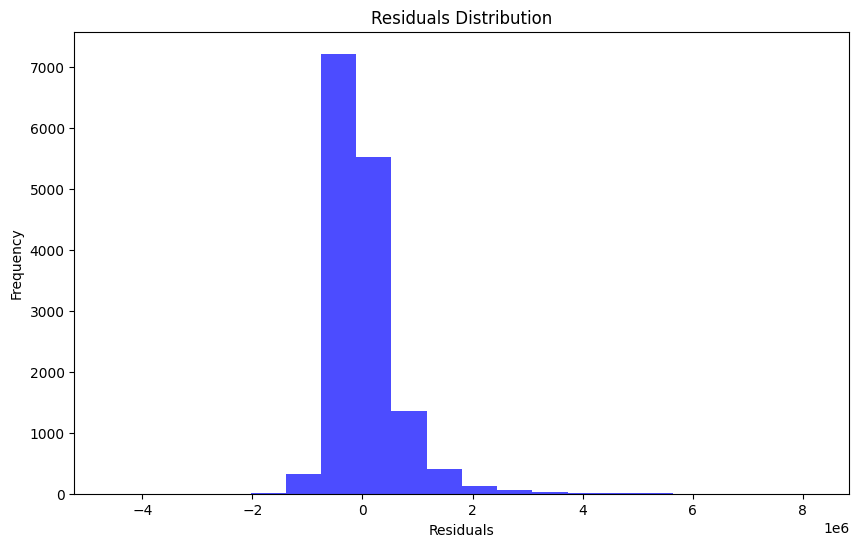

In [32]:
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=20, color='blue', alpha =0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()